In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

seed = 11

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

C:\Users\user\AppData\Local\Temp\ipykernel_27956\3909443915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Strength,bins=100)
C:\Users\user\AppData\Local\Temp\ipykernel_27956\3909443915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original.Strength,bins=100,color='red')


<AxesSubplot: xlabel='Strength', ylabel='Density'>

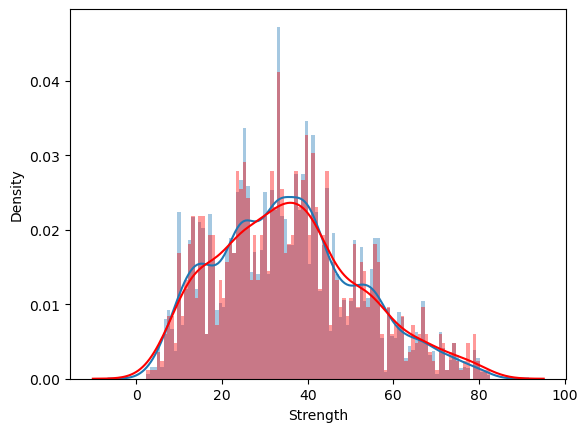

In [4]:
sns.distplot(train.Strength,bins=100)
sns.distplot(original.Strength,bins=100,color='red')

In [5]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [6]:
print(len(train))
print(len(test))

5407
3605


In [7]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
train[train.AgeInDays == 1]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
103,500.0,0.0,0.0,192.0,0.0,1125.0,613.0,1,31.54
2174,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,1,52.01
2287,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,1,6.47
2687,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,21.91
3676,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,6.27
6129,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,12.64
6146,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1,6.27


In [9]:
train.drop('Strength',axis=1).drop_duplicates().columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'],
      dtype='object')

In [10]:
train = pd.DataFrame(train.groupby(list(train.drop('Strength',axis=1).drop_duplicates().columns)).mean('Strength')).reset_index()

In [11]:
test[test.AgeInDays == 1]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
979,254.0,0.0,0.0,193.0,0.0,968.0,885.0,1
1409,236.0,0.0,0.0,194.0,0.0,968.0,885.0,1
2861,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1


In [12]:
print(len(train))
print(len(test))

3260
3605


In [13]:
train = train.drop(train[(train.AgeInDays == 1) & (train.Strength > 15)].index).reset_index(drop=True)
train = train.drop(train[(train.AgeInDays == 3) & (train.Strength > 50)].index).reset_index(drop=True)

In [14]:
# test = test.drop_duplicates()

In [15]:
# Calculate TotalComponentWeight
# train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
train['WCR'] = train['WaterComponent'] / train['CementComponent']

# Calculate Aggregate-Ratio (AR)
train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# Calculate Cement-Age
train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

# Calculate TotalComponentWeight
# test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
test['WCR'] = test['WaterComponent'] / test['CementComponent']

# Calculate Aggregate-Ratio (AR)
test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# Calculate Cement-Age
test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [16]:
# train['Unknown'] = (train.CoarseAggregateComponent-train.FlyAshComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent + train.WaterComponent + train.SuperplasticizerComponent)
# test['Unknown'] = (test.CoarseAggregateComponent-test.FlyAshComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent + test.WaterComponent + test.SuperplasticizerComponent)

In [17]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
0,102.0,0.0,0.0,192.0,0.0,879.0,942.0,3,12.460000,1.882353,17.852941,1.882353,306.0
1,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,10.045000,1.882353,17.931373,0.752941,306.0
2,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,17.276000,1.882353,17.931373,0.752941,714.0
3,102.0,153.0,0.0,192.0,0.0,887.0,942.0,28,23.793333,1.882353,17.931373,0.752941,2856.0
4,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90,26.974000,1.882353,17.931373,0.752941,9180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,540.0,0.0,0.0,182.0,0.0,1100.0,820.0,90,33.800000,0.337037,3.555556,0.337037,48600.0
3252,540.0,0.0,0.0,189.0,0.0,1125.0,633.0,7,7.720000,0.350000,3.255556,0.350000,3780.0
3253,540.0,0.0,0.0,203.0,0.0,1125.0,613.0,3,44.860000,0.375926,3.218519,0.375926,1620.0
3254,540.0,0.0,0.0,220.0,0.0,1125.0,688.7,90,38.460000,0.407407,3.358704,0.407407,48600.0


In [18]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [19]:
test.loc[197,'AgeInDays'] = 14

In [20]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])
# 90,91일 붙이기, 360-365일 붙이기

[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [21]:
train[train.AgeInDays == 91].index

Int64Index([ 420,  513,  583,  664,  846, 1000, 1062, 1069, 1090, 1362, 1482,
            1663, 1680, 1748, 1850, 2158, 2193, 2360, 2365, 2409, 2534, 2539,
            2556, 2582, 2588, 2600, 2621, 2650, 2795, 2807, 2809, 2895, 2899,
            2947, 2951, 2957, 2962, 2969, 2983, 2992, 3024, 3039, 3072, 3150,
            3210, 3215],
           dtype='int64')

In [22]:
train.loc[train[train.AgeInDays == 91].index,'AgeInDays'] = 90
test.loc[test[test.AgeInDays == 91].index,'AgeInDays'] = 90
train.loc[train[train.AgeInDays == 360].index,'AgeInDays'] = 365
test.loc[test[test.AgeInDays == 360].index,'AgeInDays'] = 365

In [23]:
print(len(train))
print(len(test))

3256
3605


In [24]:
from sklearn.preprocessing import MinMaxScaler
encoder = MinMaxScaler()
encoder.fit(np.array([i for i in sorted(train.AgeInDays.unique())]).reshape(-1,1))
train.AgeInDays = encoder.transform(np.array(train.AgeInDays).reshape(-1,1))
test.AgeInDays = encoder.transform(np.array(test.AgeInDays).reshape(-1,1))

In [25]:
from sklearn.preprocessing import StandardScaler

standard_target = ['CementComponent','WaterComponent',
                  'CoarseAggregateComponent','FineAggregateComponent']
                  #'TotalComponentWeight','WCR','AR','WCPR','Cement-Age']

for i in standard_target:
    tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
    # tar = np.array([i for i in train[f'{i}']]).reshape(-1,1)
    encoder = StandardScaler()
    encoder.fit(tar)
    train[f'{i}'] = encoder.transform(np.array(train[f'{i}']).reshape(-1,1))
    test[f'{i}'] = encoder.transform(np.array(test[f'{i}']).reshape(-1,1))

train = train.reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27956\917849795.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\ipykernel_27956\917849795.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\ipykernel_27956\917849795.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\i

In [26]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,-0.100303,66.056327,47.836886,-0.046742,5.537543,-0.076855,-0.006661,0.121330,35.602664,0.752132,7.219762,0.499764,13206.221898
std,0.984742,84.852920,61.884028,1.027735,5.631742,1.010984,0.983780,0.176092,15.843835,0.307661,2.845066,0.163752,22121.196110
min,-1.808004,0.000000,0.000000,-3.344052,0.000000,-2.357356,-2.362934,0.000000,2.330000,0.259364,2.880105,0.179278,306.000000
25%,-0.918862,0.000000,0.000000,-0.723646,0.000000,-0.677285,-0.523992,0.035714,23.840000,0.545723,4.978793,0.398762,2968.000000
50%,-0.148176,0.000000,0.000000,0.115533,5.800000,-0.166851,0.076319,0.074176,34.821500,0.673764,6.425263,0.485490,7039.200000
75%,0.561123,137.200000,107.500000,0.456619,9.500000,0.753982,0.625511,0.074176,45.702500,0.934950,9.150275,0.576577,12292.000000
max,2.393120,359.400000,200.100000,3.434353,32.200000,2.054434,2.861603,1.000000,82.600000,1.989247,18.696078,1.989247,197100.000000


In [27]:
drop_list = []

for tar in standard_target:
    for i in range(len(train)):
        if abs(train.loc[i,tar]) > 2.58:
            drop_list.append(i)

print('drop :',len(set(drop_list)))
train = train.drop(sorted(list(set(drop_list)))).reset_index(drop=True)

drop : 43


In [28]:
train = train.sort_values('Strength').reset_index(drop=True)

In [29]:
# tar = ['Cement-Age','AgeInDays','WCPR','SuperplasticizerComponent','WaterComponent']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

In [30]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
count,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000
mean,-0.099352,65.758855,47.617927,-0.023544,5.450619,-0.070366,-0.017016,0.121621,35.540145,0.753147,7.214168,0.501597,13238.418954
std,0.984259,85.197531,61.691024,0.970664,5.549978,1.007357,0.971608,0.176982,15.869516,0.305736,2.842358,0.163396,22226.150871
min,-1.808004,0.000000,0.000000,-2.477802,0.000000,-2.357356,-2.362934,0.000000,2.330000,0.259364,2.880105,0.179278,306.000000
25%,-0.918862,0.000000,0.000000,-0.653264,0.000000,-0.677285,-0.527924,0.035714,23.793333,0.547465,4.997143,0.399961,2968.000000
50%,-0.148656,0.000000,0.000000,0.115533,5.800000,-0.166851,0.076319,0.074176,34.725000,0.673764,6.425263,0.486890,7039.200000
75%,0.561123,137.200000,107.000000,0.456619,9.500000,0.753982,0.617647,0.074176,45.370000,0.935165,9.083082,0.576577,12292.000000
max,2.393120,359.400000,200.100000,2.405681,32.200000,2.054434,2.539165,1.000000,82.600000,1.989247,18.696078,1.989247,197100.000000


In [31]:
train.corr()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
CementComponent,1.000000,-0.298082,-0.318600,-0.029759,0.002512,-0.007242,-0.237174,0.085222,0.216369,-0.888145,-0.921444,-0.445943,0.281226
BlastFurnaceSlag,-0.298082,1.000000,-0.205830,0.101902,0.058744,-0.254862,-0.235722,-0.060086,0.054293,0.374825,0.281044,-0.305929,-0.122943
FlyAshComponent,-0.318600,-0.205830,1.000000,-0.315139,0.467214,-0.097210,0.099454,-0.130869,-0.018520,0.187435,0.280625,-0.250432,-0.173933
WaterComponent,-0.029759,0.101902,-0.315139,1.000000,-0.579921,-0.123074,-0.317002,0.159251,-0.151548,0.254714,-0.012826,0.383816,0.144620
SuperplasticizerComponent,0.002512,0.058744,0.467214,-0.579921,1.000000,-0.256535,0.114012,-0.159754,0.207538,-0.112645,-0.006555,-0.437467,-0.151555
CoarseAggregateComponent,-0.007242,-0.254862,-0.097210,-0.123074,-0.256535,1.000000,-0.170543,0.039936,-0.074921,-0.065910,0.071287,0.152986,0.049519
FineAggregateComponent,-0.237174,-0.235722,0.099454,-0.317002,0.114012,-0.170543,1.000000,-0.049657,-0.060358,0.102705,0.256755,0.226074,-0.116896
AgeInDays,0.085222,-0.060086,-0.130869,0.159251,-0.159754,0.039936,-0.049657,1.000000,0.327181,-0.050957,-0.083757,0.061922,0.937401
Strength,0.216369,0.054293,-0.018520,-0.151548,0.207538,-0.074921,-0.060358,0.327181,1.000000,-0.221516,-0.208515,-0.247146,0.314774
WCR,-0.888145,0.374825,0.187435,0.254714,-0.112645,-0.065910,0.102705,-0.050957,-0.221516,1.000000,0.948063,0.474046,-0.220911


<AxesSubplot: >

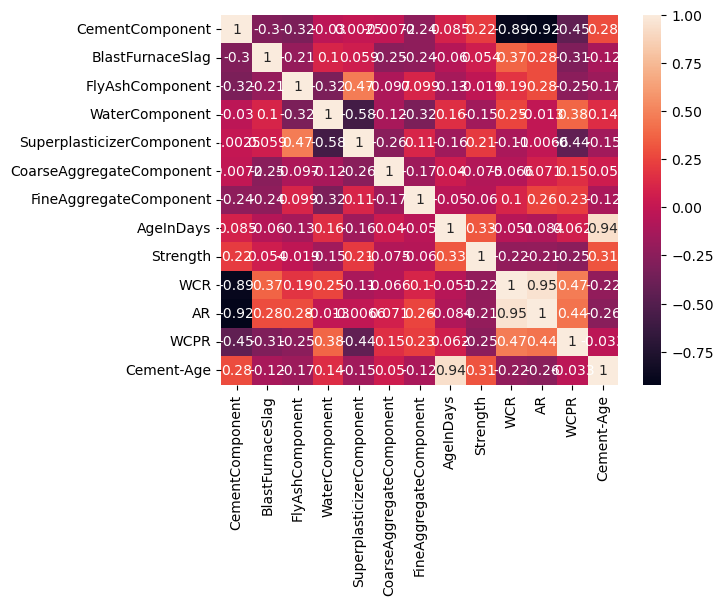

In [32]:
sns.heatmap(train.corr(),annot=True)

In [33]:
tar = ['AR','AgeInDays','FlyAshComponent','CementComponent','FineAggregateComponent','BlastFurnaceSlag']
train = train.drop(tar,axis=1)
test = test.drop(tar,axis=1)

In [34]:
X_train, X_test1, y_train, y_test1 = train_test_split(train.drop('Strength',axis=1), train.Strength, test_size=0.2, random_state=seed)

X, y = X_train, y_train
X1, y1 = X_test1, y_test1

In [35]:
len(train)

3213

In [36]:
# tar = ['SuperplasticizerComponent','AgeInDays','WCPR','Cement-Age']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

In [68]:
np.random.normal(3,0.5,100) # mu,sigma,n

array([2.76189276, 3.41515521, 2.56832374, 2.93472927, 2.73845618,
       2.87436154, 3.64563736, 2.51789757, 3.03587989, 3.13580315,
       3.42933359, 2.36796316, 3.55743514, 3.21738849, 3.43713638,
       3.03582605, 2.18047419, 2.67634868, 3.40888478, 3.01839738,
       2.97564873, 3.89576555, 4.10092816, 2.98146655, 3.96645271,
       2.00321423, 1.97547137, 3.4335276 , 2.86901946, 3.28948555,
       3.25827619, 2.95529818, 3.34106486, 3.075361  , 2.23392874,
       3.10943429, 3.09283163, 3.91638827, 2.4355528 , 3.00849844,
       2.78778559, 2.93354505, 3.82960231, 3.18932034, 2.76771697,
       3.07692062, 3.38308031, 2.50298615, 2.86782884, 3.77110461,
       3.42807602, 2.97759869, 2.76125539, 2.92296724, 2.22446027,
       3.47151799, 3.17057672, 3.06913661, 2.35128869, 2.64251878,
       3.25723982, 3.12885819, 2.75163476, 3.25251096, 3.46939156,
       2.66248986, 2.73457088, 2.56506903, 2.42236789, 3.39833592,
       3.25501401, 3.16935697, 2.41393998, 2.47701617, 2.96616

C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

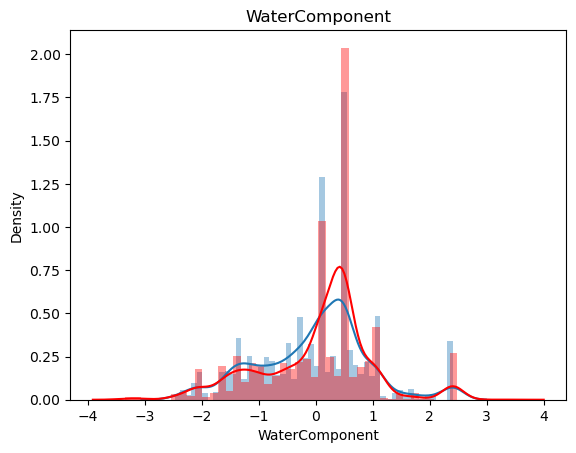

C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

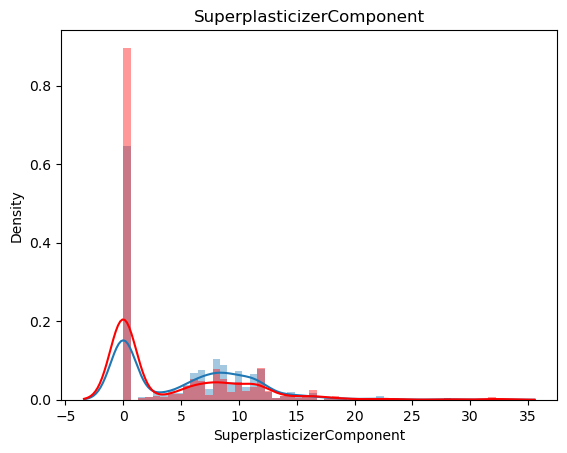

C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

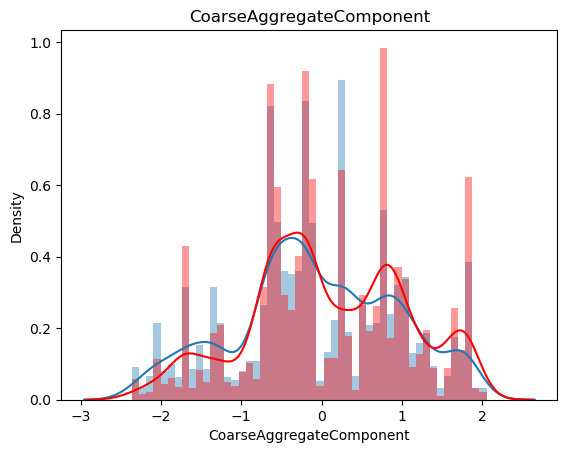

C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

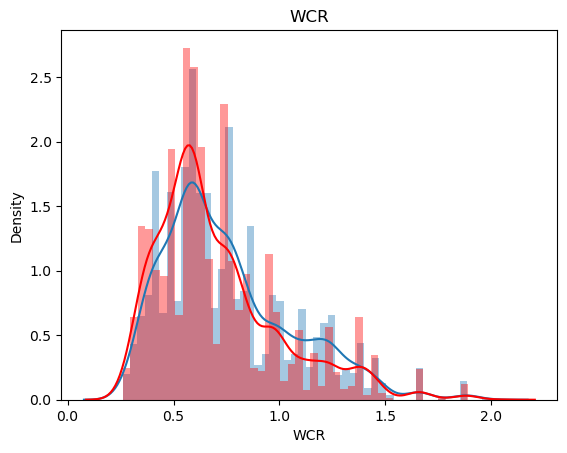

C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

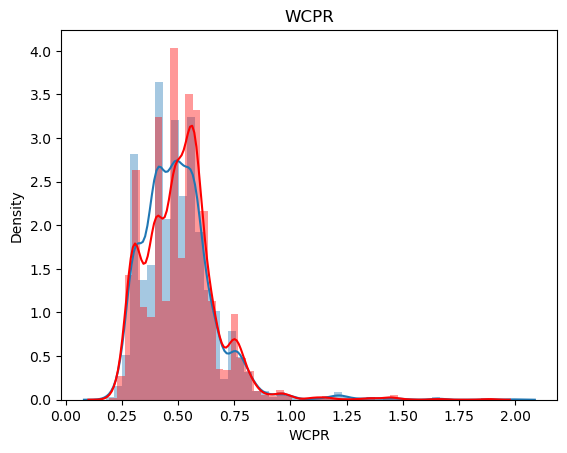

C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_27956\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

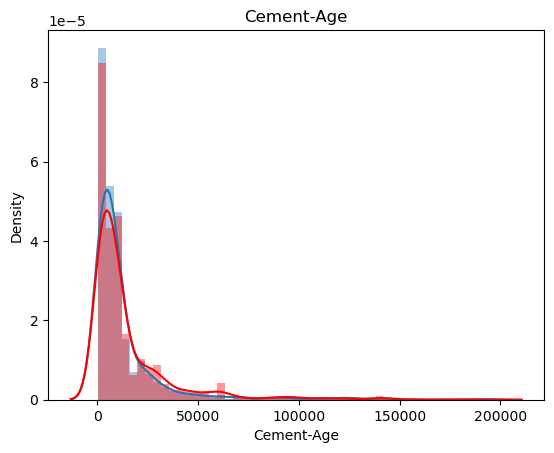

In [37]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
kor_col = ['시멘트양','용광로 찌꺼기','화석연료 재','물','감수제','건설골재양','미세골제양','양생일','강도']
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [38]:
from pycaret import regression
regression.setup(session_id=seed,data=train,target='Strength',
                 remove_outliers=True)

,Description,Value
0,session_id,11
1,Target,Strength
2,Original Data,"(3213, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2136, 6)"


(10,
 None,
       WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  \
 0           0.012666                        6.7                 -0.484910   
 1          -1.302951                       11.2                 -0.227128   
 2          -0.084787                        0.0                 -0.100161   
 3           2.405681                        0.0                 -0.677285   
 4           2.405681                        0.0                 -0.677285   
 ...              ...                        ...                       ...   
 3208        0.115533                        0.0                  1.626080   
 3209        1.214588                        1.7                 -2.357356   
 3210       -2.087990                        5.9                  1.862059   
 3211       -0.214725                        8.9                  0.219181   
 3212        2.405681                        0.0                 -0.677285   
 
            WCR      WCPR    Cement-Age  
 0     0

In [39]:
best = regression.compare_models(sort='MSE',n_select=4,fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,8.7852,138.8181,11.7546,0.4398,0.3654,0.3316,0.0250
catboost,CatBoost Regressor,8.8859,143.0444,11.9330,0.4223,0.3703,0.3305,0.3670
lightgbm,Light Gradient Boosting Machine,9.1342,149.2710,12.1806,0.3985,0.3746,0.3371,0.0140
ada,AdaBoost Regressor,9.6537,150.0412,12.2316,0.3938,0.3907,0.3886,0.0110
rf,Random Forest Regressor,9.2189,152.1052,12.3052,0.3857,0.3809,0.3439,0.0730
xgboost,Extreme Gradient Boosting,9.5389,161.4087,12.6663,0.3491,0.3895,0.3485,0.0240
et,Extra Trees Regressor,9.5882,163.0816,12.7476,0.3403,0.3969,0.3555,0.0450
knn,K Neighbors Regressor,9.9688,173.2810,13.1421,0.2989,0.3974,0.3630,0.0040
ridge,Ridge Regression,10.7952,192.2503,13.8382,0.2257,0.4455,0.4499,0.0030
lar,Least Angle Regression,10.7935,192.2508,13.8382,0.2257,0.4455,0.4498,0.0030


In [40]:
best_tune = [regression.tune_model(i) for i in best]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.9138,130.8892,11.4407,0.3812,0.3627,0.3337
1,9.3186,136.4216,11.6800,0.4355,0.4030,0.4096
2,8.1415,111.0002,10.5357,0.4876,0.3143,0.2830
3,8.8819,131.1254,11.4510,0.4781,0.3705,0.3454
4,8.5387,134.9579,11.6171,0.4329,0.3423,0.2988
5,8.5148,127.7001,11.3004,0.4738,0.3603,0.3380
6,9.5509,159.6993,12.6372,0.3139,0.3696,0.3338
7,9.5951,167.3934,12.9381,0.4065,0.4097,0.3787
8,8.9932,144.6281,12.0261,0.4830,0.3614,0.3270


In [41]:
best_tune

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.3, loss='ls', max_depth=1,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=11, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(bagging_fraction=0.5, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=56, min_child_weight=0.001, min_split_gain=0.5,
             

In [42]:
target = 'Strength'
features = list(test.columns)

In [43]:
best_tune[0]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=1,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=11, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
best_tune[0].feature_importances_

array([0.03139006, 0.05212627, 0.03637429, 0.12912314, 0.09453936,
       0.65644688])

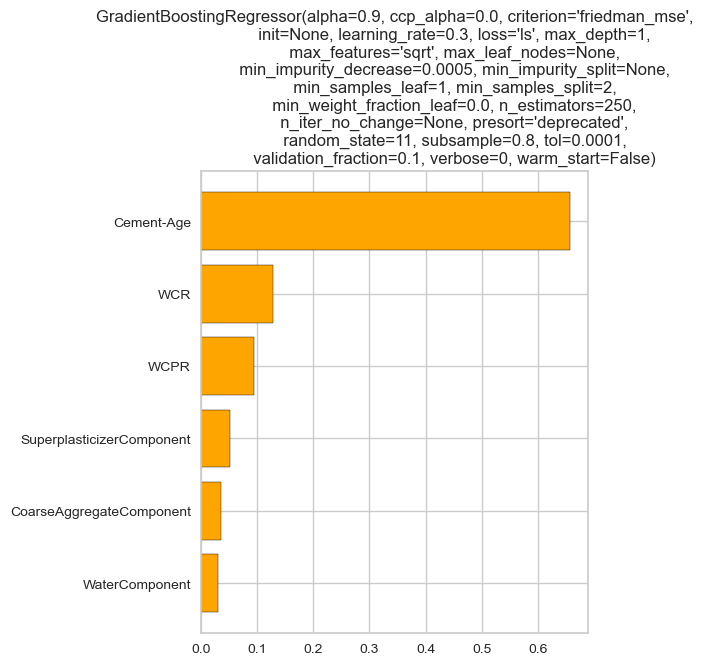

In [45]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 0
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



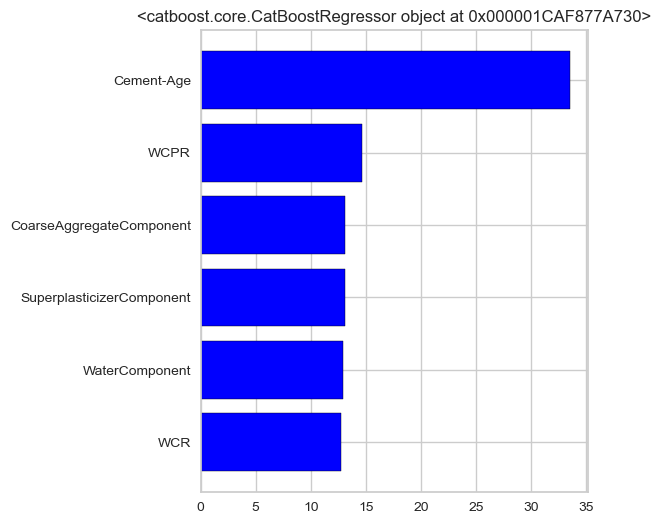

In [46]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 1
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "blue", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



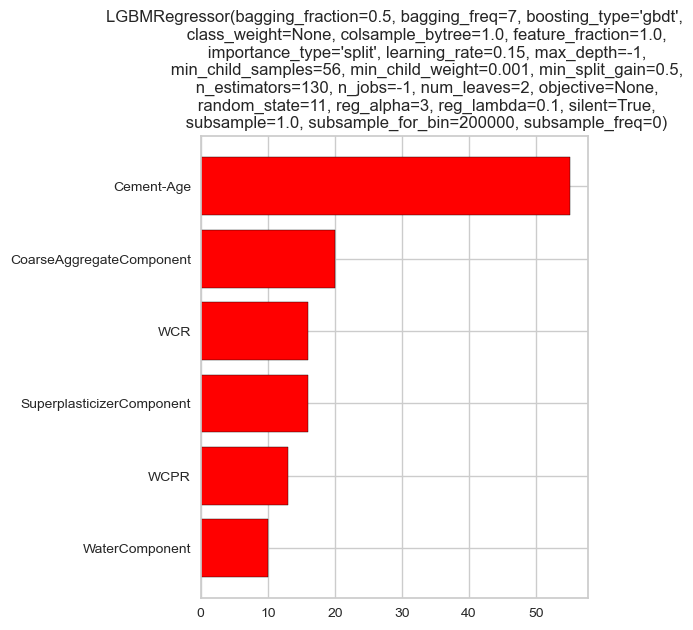

In [47]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 2
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "red", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()


In [48]:
train.loc[:,list(test.columns)]

,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,WCR,WCPR,Cement-Age
0,0.012666,6.7,-0.484910,0.786142,0.559683,701.4
1,-1.302951,11.2,-0.227128,0.917722,0.563206,521.4
2,-0.084787,0.0,-0.100161,0.565217,0.565217,966.0
3,2.405681,0.0,-0.677285,0.960000,0.480000,712.5
4,2.405681,0.0,-0.677285,0.685714,0.480000,997.5
...,...,...,...,...,...,...
3208,0.115533,0.0,1.626080,0.735446,0.735446,22725.0
3209,1.214588,1.7,-2.357356,1.019802,0.607670,5656.0
3210,-2.087990,5.9,1.862059,0.460317,0.320796,8820.0
3211,-0.214725,8.9,0.219181,0.573252,0.421300,8772.4


In [49]:
enssemble = []
for i in range(len(best_tune)):
    best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    enssemble.append(best_tune[i].predict(test))

In [50]:
enssemble

[array([40.82933458, 20.87562431, 33.63325085, ..., 37.58559856,
        35.94811274, 23.52790382]),
 array([46.50070402, 19.63206474, 33.84220928, ..., 40.7371582 ,
        36.8150415 , 21.64670652]),
 array([41.16623181, 20.90093184, 33.32605213, ..., 36.8961379 ,
        30.21312958, 24.66096182]),
 array([38.03063232, 25.91148018, 36.9330977 , ..., 37.7042527 ,
        23.73288548, 26.58196794])]

In [51]:
enssemble = np.array(enssemble)
enssemble.mean(axis=0)

array([41.63172568, 21.83002527, 34.43365249, ..., 38.23078684,
       31.67729232, 24.10438503])

In [52]:
best_tune

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.3, loss='ls', max_depth=1,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=11, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(bagging_fraction=0.5, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=56, min_child_weight=0.001, min_split_gain=0.5,
             

<AxesSubplot: xlabel='Strength', ylabel='Density'>

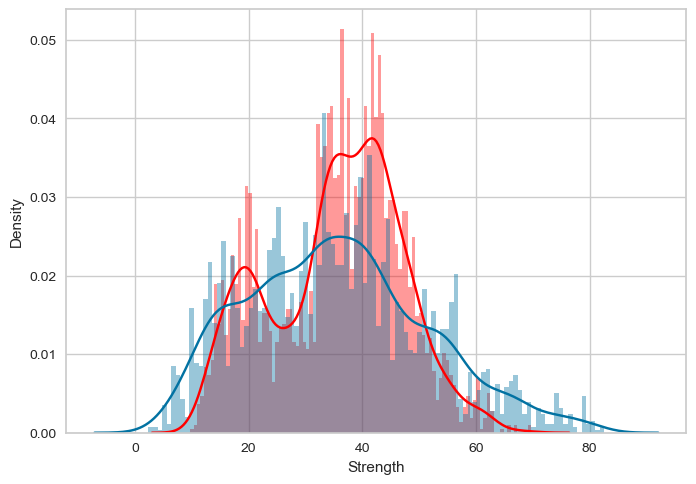

In [53]:
sub = pd.read_csv('./sample_submission.csv')
# md = best_tune[0].fit(train.drop('Strength',axis=1),train['Strength'])
sub['Strength'] = enssemble[1]#md.predict(test)
#enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sns.distplot(sub['Strength'],bins=100,color='red')
sns.distplot(train.Strength,bins=100)

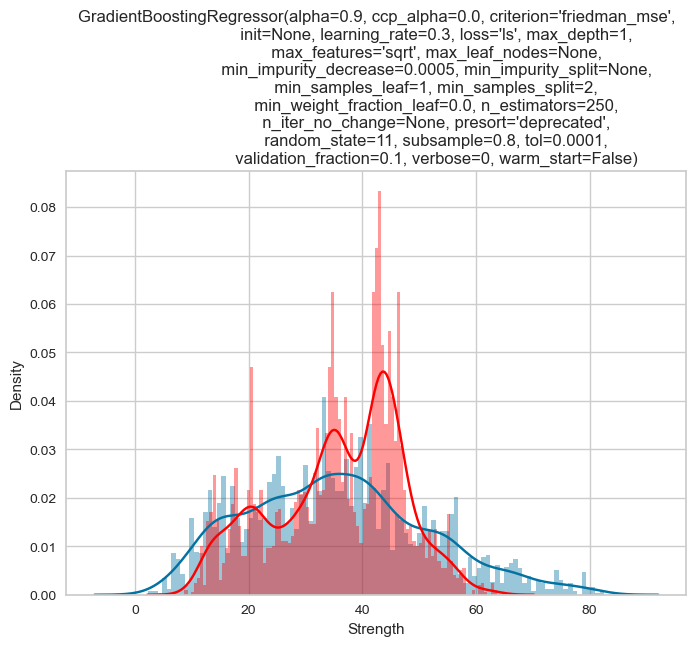

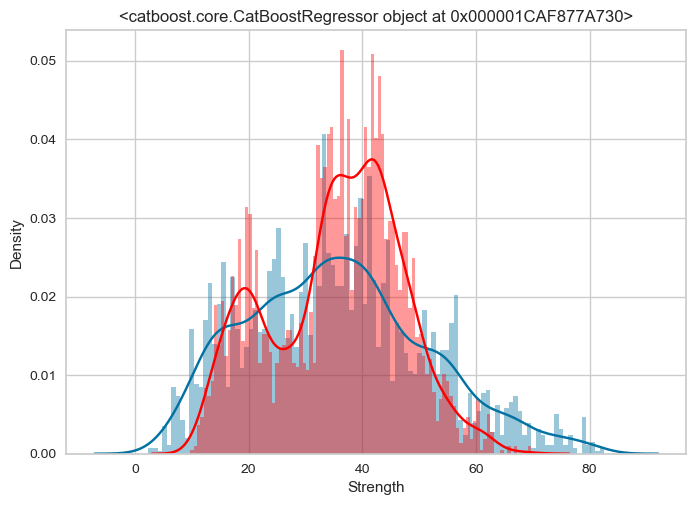

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


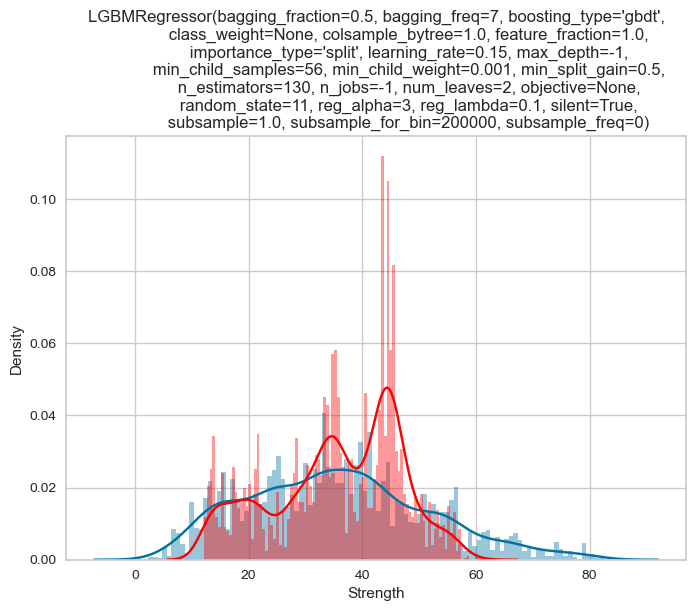

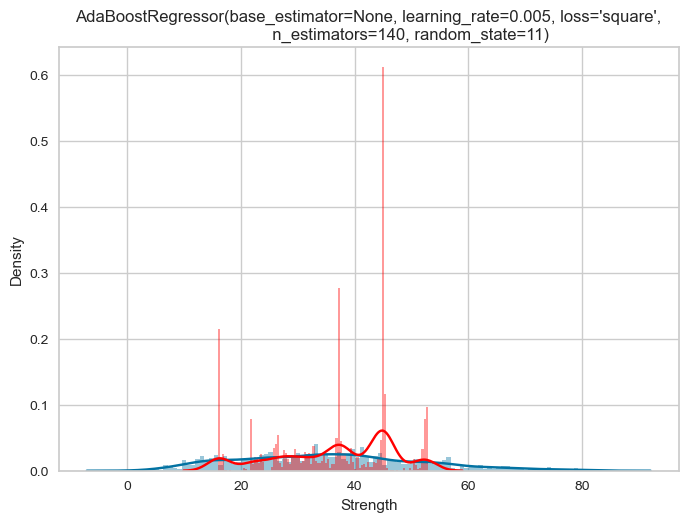

In [54]:
preds = []
for i in range(len(best_tune)):
    md = best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    pred = md.predict(test)
    preds.append(pred)
    
    plt.title(f'{md}')    
    sns.distplot(train.Strength,bins=100)
    sns.distplot(enssemble[i],bins=100,color='red')
    # sns.distplot(density_values)
    plt.show()

# Optimizing coefficients : optuna

In [55]:
from sklearn.metrics import mean_squared_error
import optuna
 
def coef_objective(trial):
    a = trial.suggest_float('a', 0, 1)
    b = trial.suggest_float('b', 0, 1)
    c = trial.suggest_float('c', 0, 1)
    d = trial.suggest_float('d', 0, 1)
#    e = trial.suggest_float('e', 0, 1)

#     X = X1
#     y = y1
    
#     preds_eval = []
#     for model in modelsCB:
#         preds_eval.append(model.predict(X))
    
#     resCB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsXB:
#         preds_eval.append(model.predict(X))
    
#     resXB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsLB:
#         preds_eval.append(model.predict(X))
    
#     resLB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsSGB:
#         preds_eval.append(model.predict(X))
    
#     resSGB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsLR:
#         preds_eval.append(model.predict(X))
    
#     resLR = np.average(np.array(preds_eval),axis=0)
    
    enssemble = []
    for i in range(len(best_tune)):
        # best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
        enssemble.append(best_tune[i].predict(X1))
        
    # res1 =  (resCB * a + resXB * b + resLB * c + resSGB * d + resLR * e)/(a + b + c + d + e)
    res1 = (enssemble[0]*a + enssemble[1]*b + enssemble[2]*c)/(a+b+c)
    
    res = mean_squared_error(y1, res1, squared=False)

    return res

study = optuna.create_study(direction= 'minimize')
study.optimize(coef_objective, n_trials= 100)

[I 2023-03-07 13:43:50,058] A new study created in memory with name: no-name-f3672d69-daa6-4ade-9bb3-c3dabe7c1a64
[I 2023-03-07 13:43:50,076] Trial 0 finished with value: 10.429936727058706 and parameters: {'a': 0.6930933808449273, 'b': 0.20208639329136469, 'c': 0.4028015492024233, 'd': 0.34602068020454724}. Best is trial 0 with value: 10.429936727058706.
[I 2023-03-07 13:43:50,095] Trial 1 finished with value: 9.18822409239757 and parameters: {'a': 0.007649120696253009, 'b': 0.6095165688353671, 'c': 0.30277935427861413, 'd': 0.2408381043075587}. Best is trial 1 with value: 9.18822409239757.
[I 2023-03-07 13:43:50,114] Trial 2 finished with value: 9.75963529064484 and parameters: {'a': 0.7091179448115781, 'b': 0.6887588680944362, 'c': 0.30204664263900427, 'd': 0.9140209237544016}. Best is trial 1 with value: 9.18822409239757.
[I 2023-03-07 13:43:50,132] Trial 3 finished with value: 10.326032243906425 and parameters: {'a': 0.5012534119208506, 'b': 0.3333070307535826, 'c': 0.768169839790

[I 2023-03-07 13:43:50,934] Trial 32 finished with value: 8.64334462794947 and parameters: {'a': 0.0006989434882127164, 'b': 0.8552967237768874, 'c': 0.08022128817825047, 'd': 0.30414036301609204}. Best is trial 11 with value: 8.639373269104292.
[I 2023-03-07 13:43:50,964] Trial 33 finished with value: 9.025100730900379 and parameters: {'a': 0.007783055049028436, 'b': 0.734578272316645, 'c': 0.26009821114598336, 'd': 0.2519298701695838}. Best is trial 11 with value: 8.639373269104292.
[I 2023-03-07 13:43:50,994] Trial 34 finished with value: 8.858824318599233 and parameters: {'a': 0.04925895887557314, 'b': 0.7113309063074094, 'c': 0.12347484590852172, 'd': 0.2966586480410258}. Best is trial 11 with value: 8.639373269104292.
[I 2023-03-07 13:43:51,025] Trial 35 finished with value: 9.406901865246136 and parameters: {'a': 0.14502951654702445, 'b': 0.5802450160706759, 'c': 0.3072982191086206, 'd': 0.45499663162605103}. Best is trial 11 with value: 8.639373269104292.
[I 2023-03-07 13:43:51

[I 2023-03-07 13:43:51,924] Trial 64 finished with value: 8.671892675368046 and parameters: {'a': 0.02759343082455162, 'b': 0.5414843052763086, 'c': 0.035153163481666895, 'd': 0.06298954296958578}. Best is trial 44 with value: 8.610957829989392.
[I 2023-03-07 13:43:51,955] Trial 65 finished with value: 8.878944665502605 and parameters: {'a': 0.07176016355564174, 'b': 0.6729070792934132, 'c': 0.10363747298888579, 'd': 0.22742229810180253}. Best is trial 44 with value: 8.610957829989392.
[I 2023-03-07 13:43:51,987] Trial 66 finished with value: 8.881886579207611 and parameters: {'a': 0.14219684213586664, 'b': 0.8270866466173984, 'c': 0.07951516436358248, 'd': 0.18513268997844734}. Best is trial 44 with value: 8.610957829989392.
[I 2023-03-07 13:43:52,018] Trial 67 finished with value: 8.5776231289206 and parameters: {'a': 0.0013396113374652407, 'b': 0.5986084108979473, 'c': 0.03178653579404693, 'd': 0.2745460816235255}. Best is trial 67 with value: 8.5776231289206.
[I 2023-03-07 13:43:52

[I 2023-03-07 13:43:52,937] Trial 96 finished with value: 8.793252198259285 and parameters: {'a': 0.0174607956395504, 'b': 0.5637882298677942, 'c': 0.09171830503377967, 'd': 0.27602342461726}. Best is trial 73 with value: 8.48645956621941.
[I 2023-03-07 13:43:52,968] Trial 97 finished with value: 8.798247649994948 and parameters: {'a': 0.09544128482856251, 'b': 0.6955323131355375, 'c': 0.047393999696427304, 'd': 0.3433604456118565}. Best is trial 73 with value: 8.48645956621941.
[I 2023-03-07 13:43:53,000] Trial 98 finished with value: 8.575364391564474 and parameters: {'a': 0.022388992198894446, 'b': 0.5892038983290857, 'c': 0.010783337658194694, 'd': 0.32209378464858157}. Best is trial 73 with value: 8.48645956621941.
[I 2023-03-07 13:43:53,030] Trial 99 finished with value: 8.715854750158908 and parameters: {'a': 0.018261315761055188, 'b': 0.5854417192334972, 'c': 0.06510541802204856, 'd': 0.32114997421314}. Best is trial 73 with value: 8.48645956621941.


In [56]:
a = study.best_params['a']
b = study.best_params['b']
c = study.best_params['c']


sum_coef = a + b + c
a = a / sum_coef
b = b / sum_coef
c = c / sum_coef

a, b, c

(0.0008321265383292462, 0.9969301138900178, 0.002237759571652903)

<AxesSubplot: xlabel='Strength', ylabel='Density'>

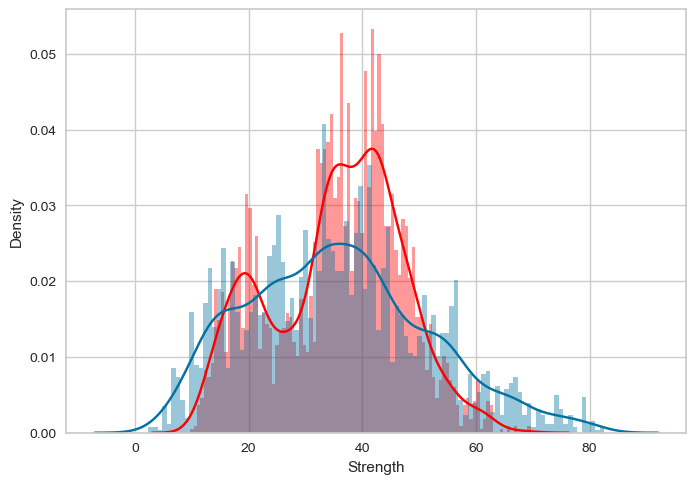

In [57]:
sub = pd.read_csv('./sample_submission.csv')
# md = best_tune[0].fit(train.drop('Strength',axis=1),train['Strength'])
# sub['Strength'] = a*enssemble[0] + b*enssemble[1] + c*enssemble[2] *d*enssemble[3] #md.predict(test)
tp = a*enssemble[0] + b*enssemble[1] + c*enssemble[2] #md.predict(test)

#enssemble[0] #.mean(axis=0)
# sub = sub.set_index('id')
# sub.to_csv('./submission.csv')
# sns.distplot(sub['Strength'],bins=100,color='red')
sns.distplot(tp,bins=100,color='red')
sns.distplot(train.Strength,bins=100)